In [12]:
import numpy as np
import pylab as pl


Question 1

```
# This is formatted as code
```



Text(0, 0.5, 'y')

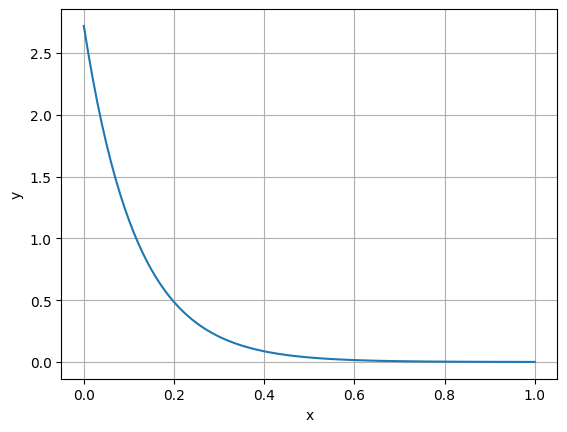

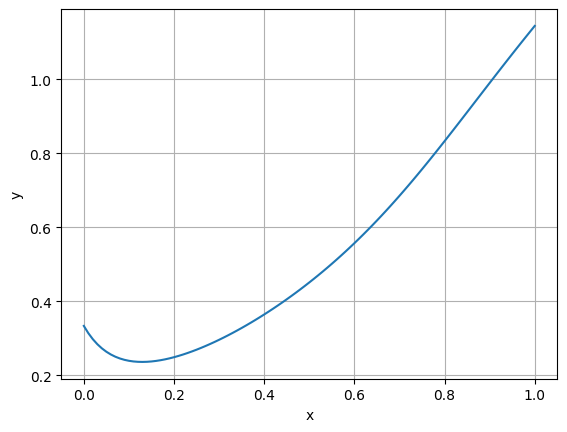

In [ ]:
#question 1
# Backward Euler


def y1(x,y):
  return -9*y
def y2(x,y):
  return -20*(y-x)**2+2*x

toll=0.00001 #tolerance
def newrap(f,x): #root finding technique
  def df(x):
    t=toll/10
    return (f(x+t)-f(x-t))/(2*t)
  h = f(x) / df(x)
  while abs(h) >toll:
    h = f(x) / df(x)
    x = x - h
  return x

def bkdelr(y,y0,x0,xn): #backward implicit euler
  h=0.01 #step size
  n=int((xn-x0)/h)
  w=np.zeros(n+1)
  x=np.zeros(n+1)
  w[0]=y0
  x[0]=x0
  for i in range(n):
    def f(t):
      return t-w[i]-h*y(x[i],t)
    w[i+1]=newrap(f,w[i]) # to solve implicitly
    x[i+1]=x[i]+h
  return x,w

xv1,wv1=bkdelr(y1,np.exp(1),0,1)
pl.plot(xv1,wv1)
pl.grid()
pl.xlabel("x")
pl.ylabel("y")

pl.figure(2)
xv,wv=bkdelr(y2,1/3.0,0,1)
pl.grid()
pl.plot(xv,wv)
pl.xlabel("x")
pl.ylabel("y")


Question 2

Absolute error: 0.0 	Relative error: 0.0
Absolute error: 0.004281727936202406 	Relative error: 0.004263472905159145
Absolute error: 0.006687851223824204 	Relative error: 0.006589325558798489
Absolute error: 0.00812421723094725 	Relative error: 0.007889016545476033
Absolute error: 0.009019185004341734 	Relative error: 0.008609921682323643
Absolute error: 0.009594162040996945 	Relative error: 0.008989506660104677
Absolute error: 0.009971593314036298 	Relative error: 0.009161423975622416
Absolute error: 0.010222887446798445 	Relative error: 0.009204376666763834
Absolute error: 0.010391505152042235 	Relative error: 0.009166385171485736
Absolute error: 0.010504836525143224 	Relative error: 0.009077582459164272
Absolute error: 0.010580648734618059 	Relative error: 0.008957297786756859


Text(0, 0.5, 'y')

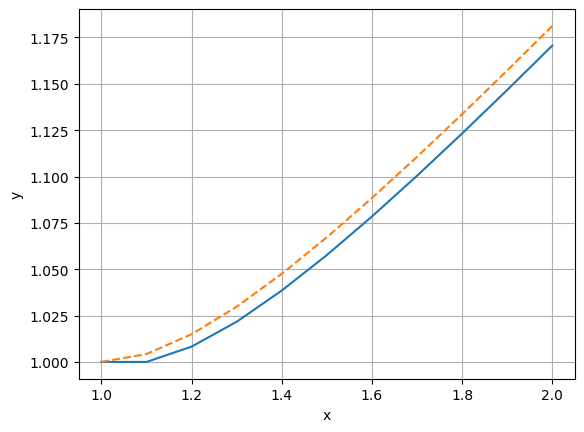

In [ ]:
#question 2
#Euler method

def f(t,y):
  return y/t -(y/t)**2

def yt(t):
  return t/(1.+np.log(t))

def euler(y,y0,x0,xn): # euler
  h=0.1 #step size
  n=int((xn-x0)/h)
  w=np.zeros(n+1)
  x=np.zeros(n+1)
  w[0]=y0
  x[0]=x0
  for i in range(n):
    w[i+1]=w[i]+h*y(x[i],w[i])
    x[i+1]=x[i]+h
  return x,w

xv,wv=euler(f,1,1,2)

for i in range(len(xv)):
  a=np.abs(yt(xv[i])-wv[i])
  r=a/np.abs(yt(xv[i]))
  print("Absolute error:", a,"\tRelative error:",r)

pl.plot(xv,wv)
pl.plot(xv,yt(xv),"--")
pl.grid()
pl.xlabel("x")
pl.ylabel("y")




Question 3

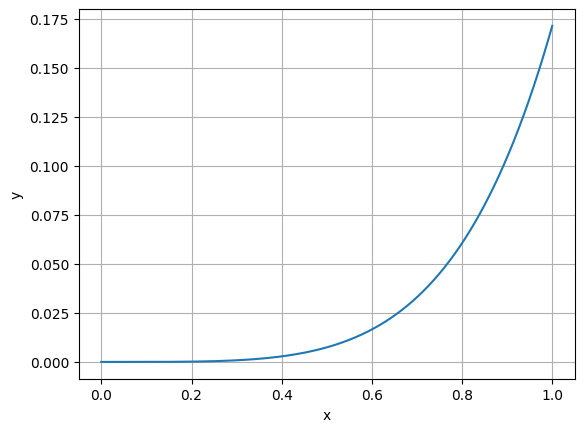

In [ ]:
#question 3
#RK4 method

def f(t,y):
  v=y[1]
  w=y[0]
  return [v, t*np.exp(t)-t-w+2*v]

def rk4(fn,y0,x0,xn): #rk4
  h=0.001 #step size
  n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  for i in range(n):
    k1= np.multiply(h,fn(x[i],w[i]))
    k2= np.multiply(h,fn(x[i]+h/2., w[i]+k1/2.))
    k3= np.multiply(h,fn(x[i]+h/2., w[i]+k2/2.))
    k4= np.multiply(h,fn(x[i]+h, w[i]+k3))
    x.append(x[i]+h)
    w.append(w[i]+(k1+2*k2+2*k3+k4)/6)
  return x,w

xv,wv=rk4(f,[0,0.00],0.00,1)
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.plot(xv,np.array(wv)[:,0])



Question 6

y'(0)= 50.00000000000001
-20.200000000000003
-10.100000000000001
-1.7763568394002505e-15
10.1


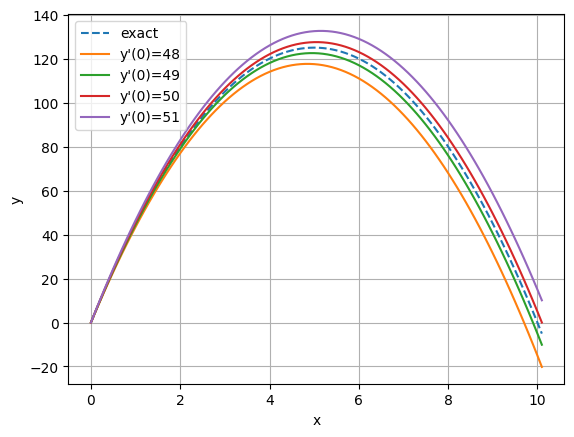

In [81]:
#question 6
#Boundary value problem using Shooting method

def f(t,y):
  v=y[1]
  w=y[0]
  return [v, -10]
g=10
def yt(t):
  return -g*t**2/2.+g*10*t/2.

def euler(y,y0,x0,xn): # euler
  h=0.1 #step size
  n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  for i in range(n+1):
    w.append(w[i]+np.multiply(h,y(x[i],w[i])))
    x.append(x[i]+h)
  return x,w
toll=0.001
def newrap(f,x): #root finding technique
  def df(x):
    t=toll/10
    return (f(x+t)-f(x-t))/(2*t)
  h = f(x) / df(x)
  while abs(h) >toll:
    h = f(x) / df(x)
    x = x - h
  return x


t1=10
def fun(r):
  x,e= euler(f,[0,r],0,t1)
  pl.plot(x,np.array(e)[:,0],label="y'(0)="+str(r))
  return np.array(e)[:,0][-1]
r1=newrap(fun,0) #to calculate root
print("y'(0)=",r1)
x,e= euler(f,[0,r1],0,t1)
#pl.plot(x,np.array(e)[:,0])
pl.plot(x,yt(np.array(x)),'--',label='exact')
for r in range(48,52):
  print(fun(r))
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.legend()


Question 7

Total number of iterations required: 1580


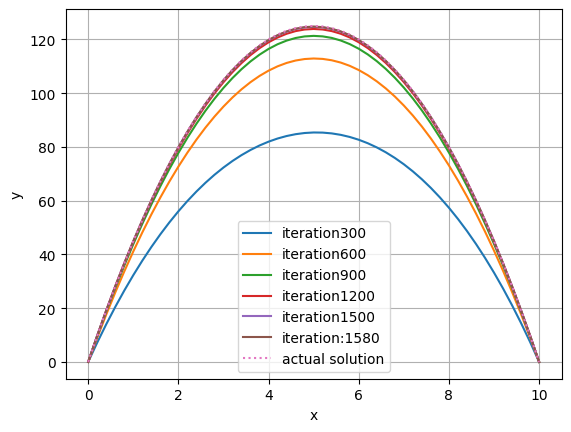

In [63]:
#question 7
#Boundary value problem using Relaxation method

toll=0.001
g=10
def yt(t):
  return -g*t**2/2.+g*10*t/2.
def relaxation():
  t1=10
  h=0.2
  x=np.arange(0,t1+h,h)
  w=np.zeros(len(x))
  w[0]=w[-1]=0
  #w_old=w
  cond=True
  j=1
  while(cond):
    w_old=w.copy()
    for i in range(1,len(x)-1):
      w[i]=-0.5*( -h**2*g -w[i-1]-w[i+1])
    cond=max(abs(w_old-w))>toll
    j=j+1
    #cond=j<1e6
    if(j%300==0):
      pl.plot(x,w,label='iteration'+str(j)) #
  pl.plot(x,w,label="iteration:"+str(j))
  print("Total number of iterations required:",j)
  pl.plot(x,yt(x),':',label="actual solution")
  pl.legend()
  #return w

pl.grid()
pl.xlabel("x")
pl.ylabel("y")
relaxation()

Question 12

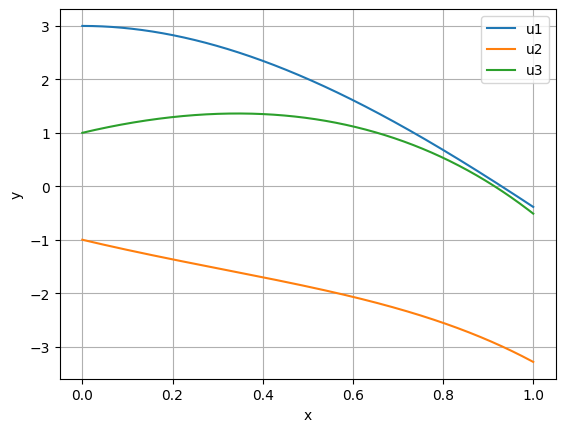

In [55]:
#question 12
#RK4 method

def f(t,y):
  u1=y[0]
  u2=y[1]
  u3=y[2]
  return [u1+2*u2-2*u3+np.exp(-t) , u2+u3-2*np.exp(-t) , u1+2*u2+np.exp(-t)]

def rk4(fn,y0,x0,xn): #rk4
  h=0.001 #step size
  n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  for i in range(n):
    k1= np.multiply(h,fn(x[i],w[i]))
    k2= np.multiply(h,fn(x[i]+h/2., w[i]+k1/2.))
    k3= np.multiply(h,fn(x[i]+h/2., w[i]+k2/2.))
    k4= np.multiply(h,fn(x[i]+h, w[i]+k3))
    x.append(x[i]+h)
    w.append(w[i]+(k1+2*k2+2*k3+k4)/6)
  return x,w

xv,wv=rk4(f,[3,-1,1],0,1)

pl.plot(xv,np.array(wv))
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.legend(["u1","u2","u3"])


Question 14

Text(0, 0.5, 'y')

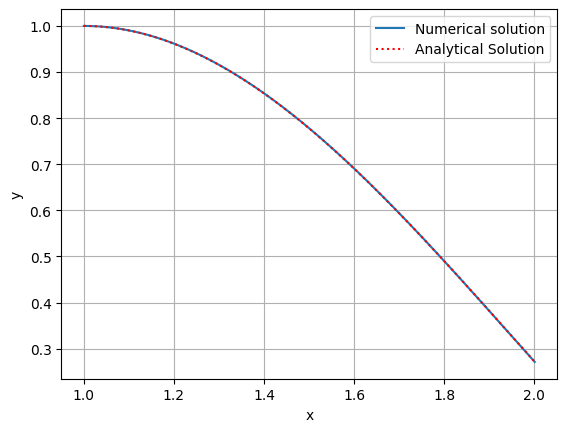

In [22]:
#question 14
#euler method

def f(t,y):
  v=y[1]
  w=y[0]
  return [v, t*np.log(t)-2*w/t**2+2*v/t]

def euler(y,y0,x0,xn): # euler
  h=0.001 #step size
  n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  for i in range(n+1):
    w.append(w[i]+np.multiply(h,y(x[i],w[i])))
    x.append(x[i]+h)
  return x,w

xv,wv=euler(f,[1,0.00],1,2)

pl.plot(xv,np.array(wv)[:,0])

def yt(t):
  return 7*t/4 +t**3 /2.*np.log(t)-3/4.*t**3

pl.plot(xv,yt(np.array(xv)),":r")
pl.legend(["Numerical solution","Analytical Solution"])
pl.grid()
pl.xlabel("x")
pl.ylabel("y")


Question 10

0.001
0.1574216960366893
0.15896622444076952
0.24986661810388425
0.35299993563510346
0.5511098635150701
0.9025843224322945


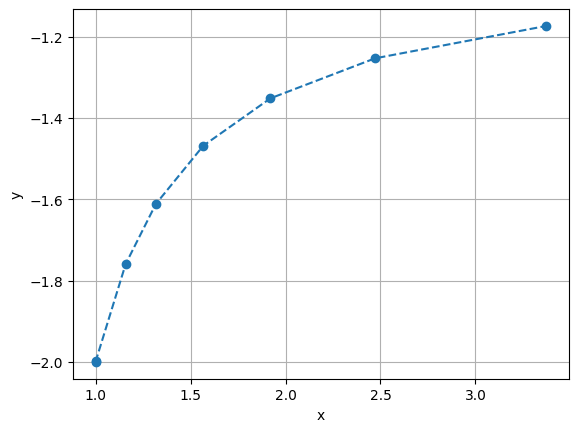

In [27]:
#question 10
#adaptive step size
#RK4 method

def f(t,y):
  return (y**2+y)/t

def adapt(y1,y2,toll,h):
  r=toll*h*30./abs(y1-y2)
  return h*r**(1/4.)

def rkstep(fn,w,t,h):
  k1= np.multiply(h,fn(t,w))
  k2= np.multiply(h,fn(t+h/2., w+k1/2.))
  k3= np.multiply(h,fn(t+h/2., w+k2/2.))
  k4= np.multiply(h,fn(t+h, w+k3))
  return (w+(k1+2*k2+2*k3+k4)/6)

toll=1e-4

def rk4(fn,y0,x0,xn): #rk4 with adaptive step size
  h=0.001 #step size
  #n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  i=0
  while(x[-1]<=xn):
    y1=rkstep(fn,w[i],x[i],2*h)
    y2_1=rkstep(fn,w[i],x[i],h)
    y2=rkstep(fn,y2_1, x[i]+h ,h)
    #if(abs(y1-y2)>toll):
     # h=adapt(y1,y2,toll,h)
     # continue
    x.append(x[i]+h)
    w.append(y2_1)
    i=i+1
    print(h)
    h=adapt(y1,y2,toll,h)
  return x,w

xv,wv=rk4(f,-2,1,3)
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.plot(xv,np.array(wv),marker='o', linestyle='--')

Question 11

Value of x at t=3.5E06 is  2.144838907183289


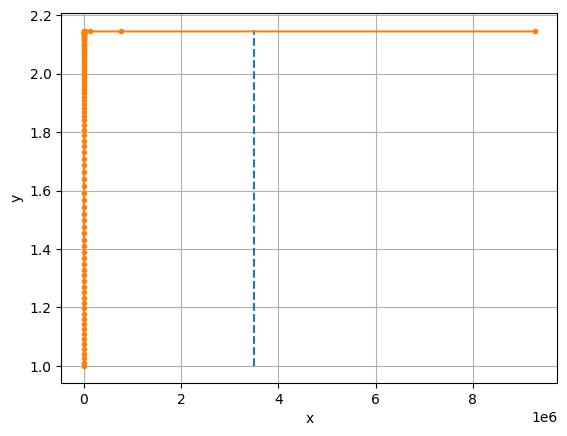

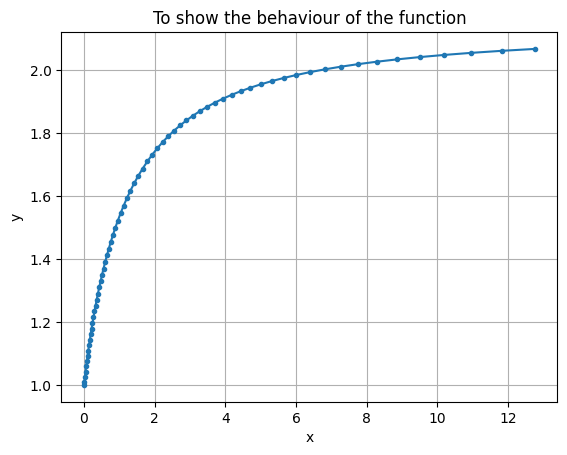

In [54]:
#question 11
#using adaptive step size
#RK4 method

def f(t,y):
  return 1./(t**2+y**2)

def adapt(y1,y2,toll,h):
  r=toll*h*30./np.abs(y1-y2)
  return h*r**(1/4.)

def rkstep(fn,w,t,h):
  k1= np.multiply(h,fn(t,w))
  k2= np.multiply(h,fn(t+h/2., w+k1/2.))
  k3= np.multiply(h,fn(t+h/2., w+k2/2.))
  k4= np.multiply(h,fn(t+h, w+k3))
  return (w+(k1+2*k2+2*k3+k4)/6)

toll=1e-8

def rk4(fn,y0,x0,xn): #rk4 with adaptive step size
  h=0.01 #step size
  n=int((xn-x0)/h)
  w=[y0]
  x=[x0]
  i=0
  while(x[-1]<=xn):
    y1=rkstep(fn,w[i],x[i],2*h)
    y2_1=rkstep(fn,w[i],x[i],h)
    y2=rkstep(fn,y2_1, x[i]+h ,h)
    x.append(x[i]+h)
    w.append(y2_1)
    i=i+1
    h=adapt(y1,y2,toll,h)
    #print(h)
  return x,w

xv,wv=rk4(f,1,0,4e6)

print("Value of x at t=3.5E06 is ",wv[-1])
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.plot([3.5e6,3.5e6],[1,2.15],'--',label='s')
pl.plot(xv,np.array(wv),marker='.', linestyle='-')

pl.figure(2)
pl.title("To show the behaviour of the function")
xv,wv=rk4(f,1,0,12)
pl.grid()
pl.xlabel("x")
pl.ylabel("y")
pl.plot(xv,np.array(wv),marker='.', linestyle='-')

Question 8

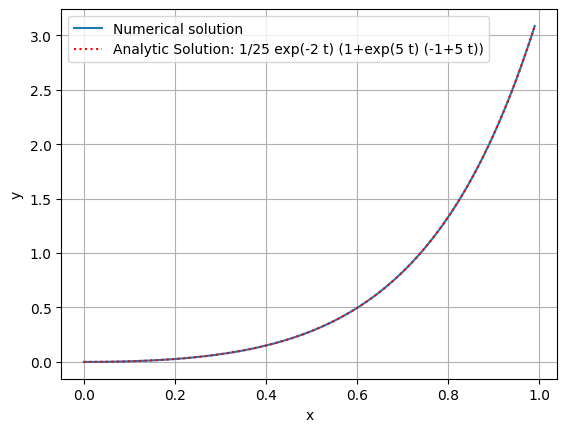

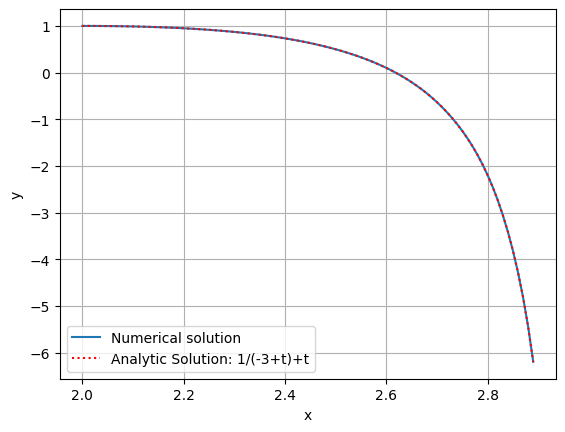

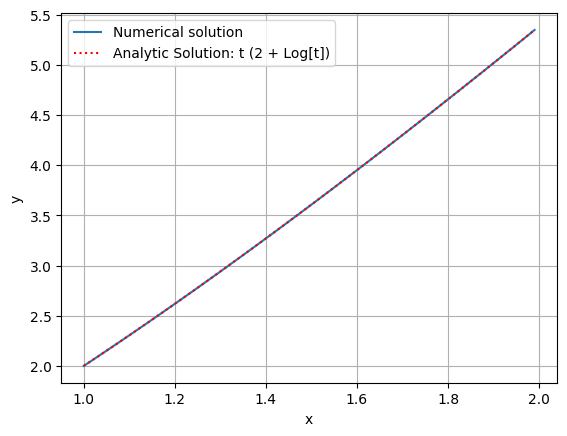

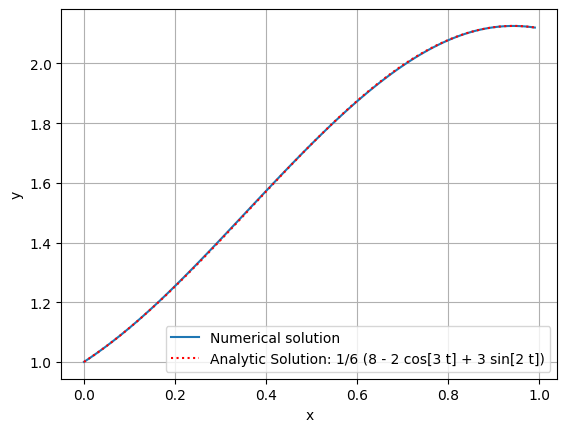

In [41]:
#question 8
from scipy.integrate import *

def f(t,y,n):
  if(n==1):
    return t*np.exp(3*t)-2*y
  elif(n==2):
    return 1-(t-y)**2
  elif(n==3):
    return 1+y/t
  elif(n==4):
    return np.cos(2*t)+np.sin(3*t)

def yt(t,n):
  if(n==1):
    return 1/25.0*np.exp(-2*t)*(1+np.exp(5*t)*(5*t-1))
  elif(n==2):
    return 1/(t-3.)+t
  elif(n==3):
    return t*(2+np.log(t))
  elif(n==4):
    return 1/6.*(8-2*np.cos(3*t)+3*np.sin(2*t))


t_span = [(0, 1),(2,2.9),(1,2),(0,1)]
y0 = [[0],[1],[2],[1]]

for i in range(4):
  n=1+i
  def g(t,y):
    return f(t,y,n)
  sol = solve_ivp(g, t_span[i], y0[i],t_eval=np.arange(min(t_span[i]),max(t_span[i]),0.01))
  pl.figure(n)
  pl.xlabel("x")
  pl.ylabel("y")
  pl.grid()
  pl.plot(sol.t,sol.y[0])
  pl.plot(sol.t,yt(sol.t,i+1),':r')
  func=["1/25 exp(-2 t) (1+exp(5 t) (-1+5 t))","1/(-3+t)+t","t (2 + Log[t])","1/6 (8 - 2 cos[3 t] + 3 sin[2 t])"]
  pl.legend(["Numerical solution","Analytic Solution: "+func[i]])


Question 9

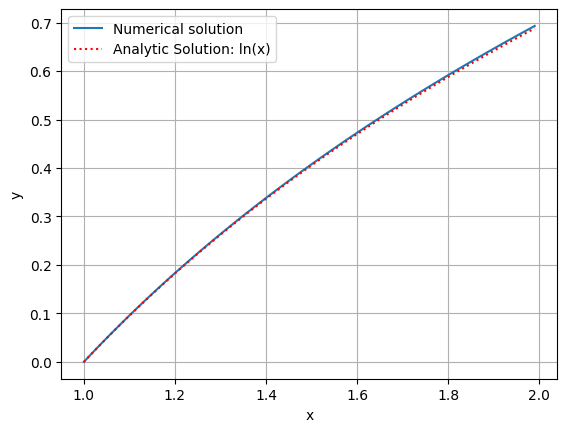

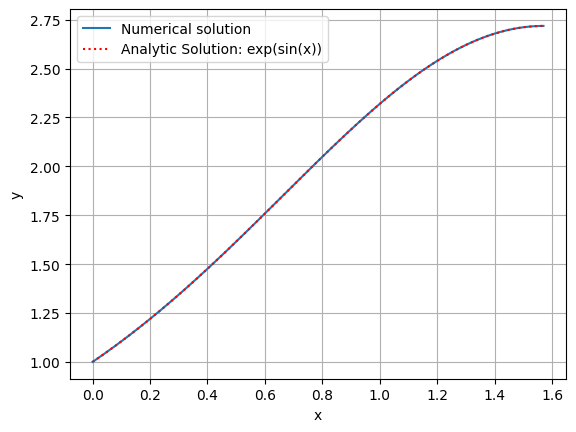

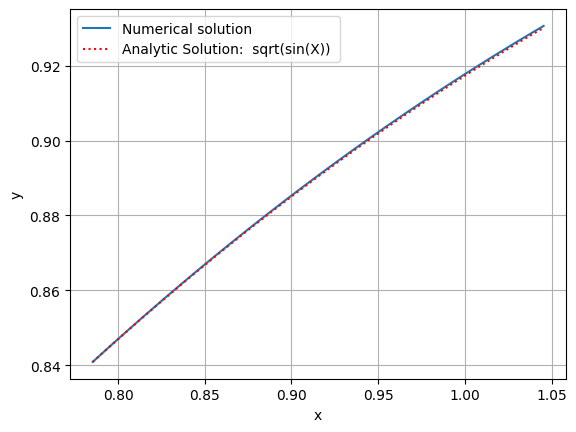

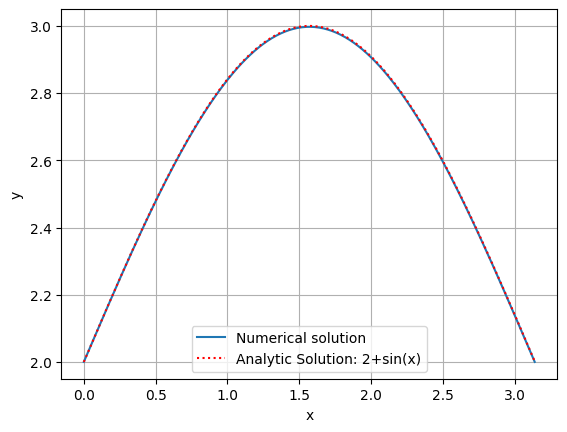

In [45]:
#question 9
from scipy.integrate import *

def f(t,y,n):
  v=y[1]
  w=y[0]
  if(n==1):
    return [v, -np.exp(-2*w)]
  elif(n==2):
    return [v, v*np.cos(t)-w*np.log(w+0.00001)]
  elif(n==3):
    return [v, -(2.*v**3+w**2 *v)/np.cos(t)]
  elif(n==4):
    return [v, 0.5-v**2/2.-w*np.sin(t)/2.]

def yt(x,n):
  if(n==1):
    return np.log(x)
  elif(n==2):
    return np.exp(np.sin(x))
  elif(n==3):
    return np.sqrt(np.sin(x))
  elif(n==4):
    return 2+np.sin(x)

x0 = [(1,2),(0,np.pi/2),(np.pi/4,np.pi/3),(0,np.pi)]
y0 = [[0,np.log(2)],[1.,np.exp(1.)],[2**(-0.25),12**(0.25)/2.],[2,2]]

for i in range(4):
  n=1+i
  a=y0[i][0]
  b=y0[i][1]
  def bc(ya,yb):
    return np.array([ya[0]-a,yb[0]-b])
  #print([ya[0],yb[0]])
  def g(t,y):
    return f(t,y,n)
  x=np.arange(min(x0[i]),max(x0[i]),0.01)
  y=np.zeros((2,len(x)))
  sol = solve_bvp(g,bc,x,y)
  #print(sol)
  pl.figure(n)
  pl.xlabel("x")
  pl.ylabel("y")
  pl.grid()
  func=["ln(x)","exp(sin(x))"," sqrt(sin(X)) ","2+sin(x)"]
  pl.plot(sol.x,sol.y[0])
  pl.plot(sol.x,yt(sol.x,i+1),':r')
  pl.legend(["Numerical solution","Analytic Solution: "+func[i]])